# 데이터 셋 불러오기

In [2]:
import pandas as pd

pd.read_csv()

In [4]:
# 데이터 셋 불러오기
import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path='./data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


# 데이터 확인하기

In [5]:
# 모양 확인
chipo.shape

(4622, 5)

In [6]:
# 데이터 정보 확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [8]:
# 행과 열 데이터 확인
chipo.head(3)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39


In [9]:
# 컬럼 목록 확인
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### 컬럼(피처) 의미
- order_id: 주문 번호
- quantity: 아이템의 주문 수량
- item_name: 주문한 아이템의 이름
- choice_description: 주문한 아이템의 상세 선택 옵션
- item_price: 주문 아이템의 가격 정보


In [10]:
# index 확인
chipo.index

RangeIndex(start=0, stop=4622, step=1)

- 데이터 수치 특성 종류(Feature Type)
  - 수치형
    - 연속형(키, 몸무게)
    - 비연속형(나이)
  - 범주형
    - 순서 있는 범주형(학점)
    - 순서 없는 범주형(혈액형)


- 데이터 수치 특성 확인
    - quantity와 item_price 요약 통계
    - order_id와 item_name의 개수 확인



In [11]:
# describe() - 요약(기술) 통계 확인
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [14]:
# order_id는 수치적인 특징이 아니므로 문자열로 변환
chipo['order_id'] = chipo['order_id'].astype(str)

In [16]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [15]:
# describe() - 요약(기술) 통계 확인 - 수치형 데이터만 확인됨
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [17]:
# order_id와 같은 데이터는 범주형이므로 기술 통계가 큰 의미는 없을 수 있음
# 컬럼에 들어있는 값의 범주 확인
chipo['order_id'].unique()

array(['1', '2', '3', ..., '1832', '1833', '1834'], dtype=object)

In [18]:
# 데이터 행 수와 같으므로 유일한 값이 사용됨을 확인
len(chipo['order_id'].unique())

1834

In [19]:
# 메뉴 아이템이 50개로 보여짐
len(chipo['item_name'].unique())

50

# 인사이트 발견하기(탐색 및 시각화)
- 가장 많이 주문한 item은?
- item 당 주문의 총량은?

In [26]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_counts = chipo['item_name'].value_counts()[:10]
item_counts

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [27]:
# item개수 변수의 타입 확인
type(item_counts)

pandas.core.series.Series

In [31]:
# 첫 번째 요소의 값 확인
item_counts[0]

726

In [32]:
# 시리즈의 인덱스 확인
item_counts.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa'],
      dtype='object')

In [35]:
type(item_counts.index)

pandas.core.indexes.base.Index

In [36]:
# 인덱스를 리스트로
item_names = list(item_counts.index)
item_names

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink',
 'Steak Bowl',
 'Chips',
 'Bottled Water',
 'Chicken Soft Tacos',
 'Chips and Fresh Tomato Salsa']

In [37]:
# 출력 모양 만들기
for idx in range(len(item_counts)):
    print(f'Top {idx+1}: {item_names[idx]} {item_counts[idx]}')    

Top 1: Chicken Bowl 726
Top 2: Chicken Burrito 553
Top 3: Chips and Guacamole 479
Top 4: Steak Burrito 368
Top 5: Canned Soft Drink 301
Top 6: Steak Bowl 211
Top 7: Chips 211
Top 8: Bottled Water 162
Top 9: Chicken Soft Tacos 115
Top 10: Chips and Fresh Tomato Salsa 110


In [39]:
# 위 코드를 다음과 같이 사용할 수 있음
for idx, (name, count) in enumerate(item_counts.items(), 1):
    print(f'Top {idx}: {name} {count}')

Top 1: Chicken Bowl 726
Top 2: Chicken Burrito 553
Top 3: Chips and Guacamole 479
Top 4: Steak Burrito 368
Top 5: Canned Soft Drink 301
Top 6: Steak Bowl 211
Top 7: Chips 211
Top 8: Bottled Water 162
Top 9: Chicken Soft Tacos 115
Top 10: Chips and Fresh Tomato Salsa 110


In [40]:
for name, count in item_counts.items():
    print(f'{name} {count}')

Chicken Bowl 726
Chicken Burrito 553
Chips and Guacamole 479
Steak Burrito 368
Canned Soft Drink 301
Steak Bowl 211
Chips 211
Bottled Water 162
Chicken Soft Tacos 115
Chips and Fresh Tomato Salsa 110


In [41]:
for i, (name, count) in enumerate(item_counts.items(), 0):
    print(f'{i} {name} {count}')

0 Chicken Bowl 726
1 Chicken Burrito 553
2 Chips and Guacamole 479
3 Steak Burrito 368
4 Canned Soft Drink 301
5 Steak Bowl 211
6 Chips 211
7 Bottled Water 162
8 Chicken Soft Tacos 115
9 Chips and Fresh Tomato Salsa 110


### 가장 많이 주문한 아이템 찾기

In [47]:
# 가장 많이 주문한 item 확인하기
# list(chipo['item_name'].value_counts().index)[0]
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

In [51]:
# 아이템별 주문 개수 출력
chipo.groupby('item_name')['order_id'].count().head()

item_name
6 Pack Soft Drink        54
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    11
Barbacoa Salad Bowl      10
Name: order_id, dtype: int64

In [61]:
# 아이템별 주문 총량 계산
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:3]

item_name
6 Pack Soft Drink    55
Barbacoa Bowl        66
Barbacoa Burrito     91
Name: quantity, dtype: int64

#### 해석
- 주문 개수
    주문 할 때 해당 아이템이 포함된 횟수
- 주문 총량
    해당 아이템이 주문 된 총 개수


### 시각화

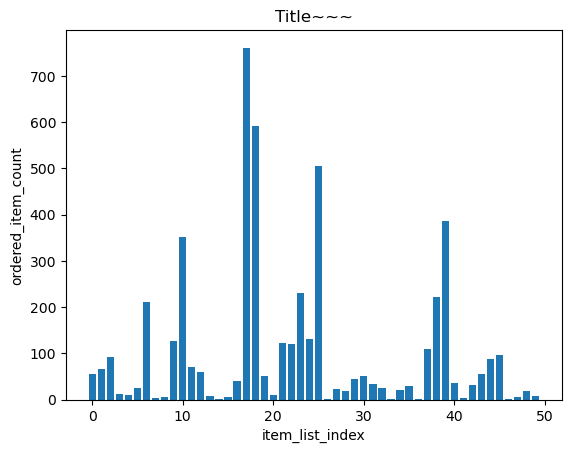

In [66]:
import matplotlib.pyplot as plt
import numpy as np

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt)
plt.ylabel('ordered_item_count')
plt.xlabel('item_list_index')
plt.title('Title~~~')

plt.show()

# 데이터 전처리


In [67]:
# item_price 피처 확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB


In [72]:
# 앞 일부만 확인
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

### item_price 에서 $기호 삭제하기

In [74]:
# 람다 활용 일괄 적용
chipo['item_price'].apply(lambda x: float(x[1:]))

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [77]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [79]:
# 데이터프레임에 수정된 사항 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

TypeError: 'float' object is not subscriptable

In [80]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [81]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


- apply 함수는 시리즈 단위의 연산을 처리
- sum(), mean()과 같은 연산이 정의된 함수를 파라미터로 받아 모든 데이터에 적용
- 피처 단위의 데이터 변환에 사용

# 탐색적 데이터 분석
- 스무고개 같은 개념으로 데이터를 분석하는 것

In [84]:
# 주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [111]:
# 한 주문에 20달러 이상 지불한 주문 번호(id) 출력
cgr = chipo.groupby('order_id').sum(numeric_only=True)
result = cgr[cgr.item_price >= 20]
result

,quantity,item_price
order_id,,
1000,2,20.50
1004,2,21.96
1006,8,71.40
1010,5,33.24
1012,2,22.50
...,...,...
987,2,23.00
995,3,24.95
996,4,43.00


In [112]:
# 인덱스 값 목록 확인
result.index.values

array(['1000', '1004', '1006', '1010', '1012', '1013', '1016', '1017',
       '1026', '103', '1030', '1031', '1033', '1035', '1038', '1041',
       '1044', '1051', '1052', '1057', '1059', '1063', '1070', '1071',
       '1074', '1076', '1078', '1079', '108', '1080', '1082', '1085',
       '1087', '1088', '1091', '1092', '1095', '1097', '110', '1102',
       '1103', '1106', '1110', '1113', '1115', '1116', '1126', '1128',
       '1136', '1138', '1140', '1142', '1153', '1154', '1156', '1157',
       '1158', '1166', '1167', '1168', '1169', '1170', '1171', '1175',
       '1176', '1182', '1188', '1189', '1191', '1193', '1196', '1206',
       '1208', '1209', '1221', '1222', '1223', '1224', '1226', '1228',
       '123', '124', '1243', '1244', '1248', '125', '1250', '1255',
       '1257', '126', '1261', '1269', '1270', '1271', '1276', '128',
       '1282', '1283', '1289', '129', '1294', '1296', '1297', '1304',
       '1317', '132', '1320', '1322', '1323', '1330', '1331', '1334',
       '1336', '

In [113]:
# 인덱스 개수 확인
len(result)

589

### 각 아이템의 가격 구하기
- 주어진 데이터만으로 각 아이템의 가격을 대략 유추해야 함

#### 유추 과정
- chipo[chipo.quantity == 1]로 동일 아이템을 한 1개만 구매한 주문을 선별
- item_name을 기준으로 groupby연산 수행 후 min()함수로 각 그룹별 최저가 계산
- item_price를 기준으로 시리즈를 정렬 해주는 (sort_values()) 함수 적용

In [123]:
# 각 아이템의 가격 구하기
# chipo['quantity']
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by='item_price', ascending=False)[0:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


### 시각화하기
- 각 아이템의 대략적인 가격을 2개의 그래프로 시각화

In [124]:
item_name_list = price_per_item.index.tolist()
print(item_name_list)
x_pos = np.arange(len(item_name_list))
print(x_pos)
item_price = price_per_item['item_price'].tolist()
print(item_price)

['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito', 'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips', 'Chips and Fresh Tomato Salsa', 'Chips and Guacamole', 'Chips and Mild Fresh Tomato Salsa', 'Chips and Roasted Chili Corn Salsa', 'Chips and Roasted Chili-Corn Salsa', 'Chips and Tomatillo Green Chili Salsa', 'Chips and Tomatillo Red Chili Salsa', 'Chips and Tomatillo-Green Chili Salsa', 'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze', 'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl', 'Steak Burrito', 'Steak Crispy Tacos', 'Steak Salad', 'Steak Salad Bowl', 'Steak Soft Tacos', 'Veggie Bowl', 'Veggie Burrito', 'Veg

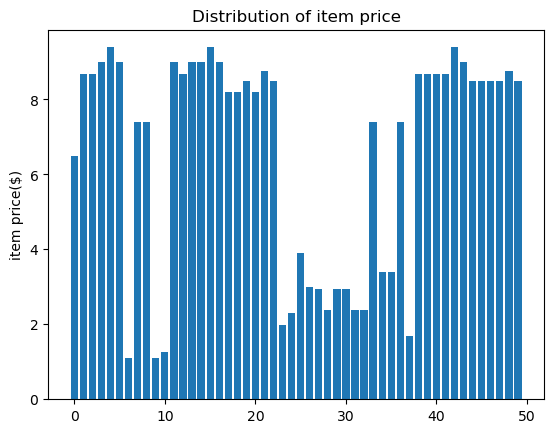

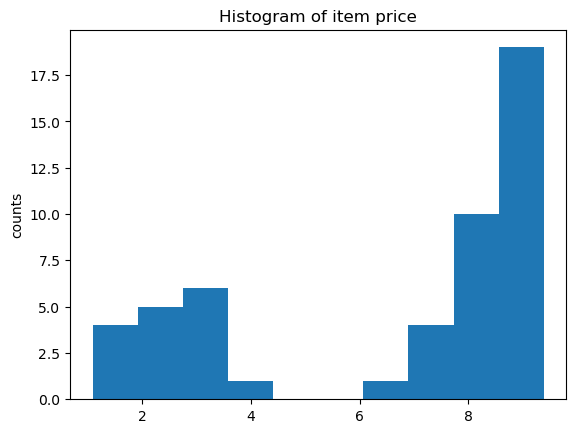

In [125]:
# 아이템 가격 분포 그래프 - 각 아이템의 가격 확인
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

# 아이템 가격 히스토그램 - 각 아이템 가격의 개수
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

### 가장 비싼 주문에서 팔린 아이템 개수
- order_id 그룹별 합계 적용
- item_price를 기준으로 정렬

In [129]:
a = chipo.groupby('order_id')
b = a.sum(numeric_only=True)
c = b.sort_values(by='item_price', ascending=False)
c

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
1014,2,10.08
730,2,10.08
14,2,10.08


### 'Vaggie Salad Bowl'이 몇 번 주문 되었는지 구하기
- chipo[chipo['item_name'] == 'Veggie Salad Bowl']으로 필터링
- drop_duplicates()로 중복된 item_name 제거
- chipo_salad 길이 출력

In [131]:
a = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
b = a.drop_duplicates(['order_id', 'item_name'])
b

,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


In [133]:

print('주문 횟수:' , len(b))
b


주문 횟수: 18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


### 'Chicken Bowl'을 2개 이상 주문한 고객들의 'Chicken Bowl' 메뉴에 대한 총 주문 수량
- 'Chicken Bowl'을 주문 한 데이터만 필터링
- groupby함수로 order_id마다 quantity를 모두 더함
- 데이터프레임에서 quantity가 2 이상인 것을 선택


In [136]:
# 치킨볼을 주문한 데이터만 필터링
chipo[chipo['item_name'] == 'Chicken Bowl']

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [137]:
# 치킨볼을 주문한 데이터만 필터링하여 변수에 담아 확인
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49


In [139]:
# groupby함수로 order_id마다 quantity를 모두 더함
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum(numeric_only=True)
chipo_chicken_ordersum = chipo_chicken_ordersum['quantity']
chipo_chicken_ordersum

order_id
10      1
1000    1
1004    2
1006    1
1008    1
       ..
991     1
992     1
995     1
997     2
998     1
Name: quantity, Length: 615, dtype: int64

In [140]:
# 데이터프레임에서 quantity가 2 이상인 것을 선택
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]
chipo_chicken_result

order_id
1004    2
1023    2
1072    2
1078    2
1091    2
       ..
972     2
973     3
983     2
986     2
997     2
Name: quantity, Length: 114, dtype: int64

In [142]:
print('치킨볼을 2개 이상 주문한 주문 횟수:', len(chipo_chicken_result))

치킨볼을 2개 이상 주문한 주문 횟수: 114


# 정리
- 가장 많이 주문된 아이템: item_name - 'Chicken Bowl'
- 주문 된 전체 아이템 종류: item_name - 50가지 아이템
- 아이템 당 주문된 총 개수: item_name - 50개 중 8개 정도의 아이템이 주문의 많은 부분을 차지
- 주문 당 평균 계산 금액: item_price - 평균은 약 18달러, 표준편차는 11달러
                                       25~75%에 해당하는 구간이 12 ~21달러
                                       최대값은 200을 넘음
                                       소수의 주문을 제외하고 대부분 평균 근처의 금액
                                       표준 편차는 예외처리나 보정값을 계산할 필요가 있을 수 있음
- 각 아이템 가격: item_price - 아이템 가격은 2~4, 6~8달러 정도